# Zillow Notebook 1

#### Imports

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it
from math import sqrt
# to turn off pink warning boxes basically for display purposes in class
# import warnings
# warnings.filterwarnings('ignore')

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# import tools for scaling
import sklearn.preprocessing

# classification algorithms
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# linear regression algorithms
from sklearn.linear_model import LinearRegression

# classification analysis
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# to see local file system
import os

# import our own modules
import env
import wrangle as w
import prep as p

np.random.seed = 9751

# jupyter settings
%matplotlib inline

### Acquire Clean Data

In [2]:
zillow = w.remove_outliers(w.clean_zillow_data2017())
zillow.head()

,bedrooms,bathrooms,area,year_built,fips,zip,tax_value_2016,tax_amount_2016,tax_value,tax_amount,age,tax_rate_2016,zip_mean_tv_2016
0,4,3.5,3100.0,1998,6059,96978,1007912.0,11013.72,1023282.0,11013.72,19,0.01093,1200025.0
1,2,1.0,1465.0,1967,6111,97099,452000.0,5573.12,464000.0,5672.48,50,0.01255,494572.0
2,3,2.0,1243.0,1962,6059,97078,556295.0,6488.30,564778.0,6488.30,55,0.01166,648863.0
3,4,3.0,2376.0,1970,6037,96330,142963.0,1777.51,145143.0,1777.51,47,0.01243,438677.0
4,4,3.0,2962.0,1950,6037,96293,761688.0,9516.26,773303.0,9516.26,67,0.01249,926677.0


In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46117 entries, 0 to 46116
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          46117 non-null  int64  
 1   bathrooms         46117 non-null  float64
 2   area              46117 non-null  float64
 3   year_built        46117 non-null  int64  
 4   fips              46117 non-null  int64  
 5   zip               46117 non-null  int64  
 6   tax_value_2016    46117 non-null  float64
 7   tax_amount_2016   46117 non-null  float64
 8   tax_value         46117 non-null  float64
 9   tax_amount        46117 non-null  float64
 10  age               46117 non-null  int64  
 11  tax_rate_2016     46117 non-null  float64
 12  zip_mean_tv_2016  46117 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 4.6 MB


### Univariate Analysis

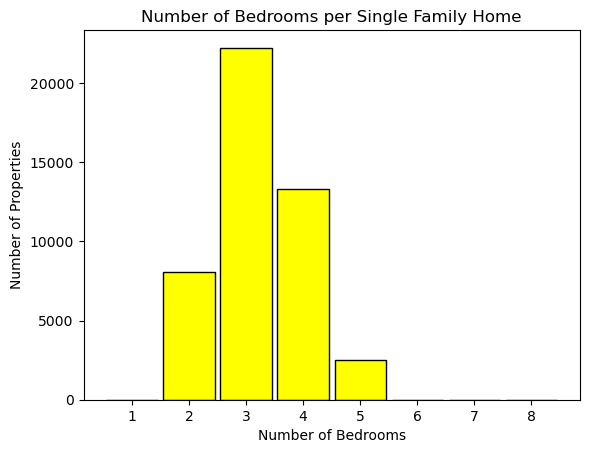


The mean number of bedrooms is 3.22
The median number of bedrooms is 3.0
The mode number of bedrooms is 3
The feature bedrooms has a relatively normal distribution
____________________________________________________________
____________________________________________________________


In [4]:
# Number of Bedrooms

plt.hist(x='bedrooms', data=zillow, bins=range(1,10), 
         rwidth=.9, color='yellow', ec='black', align='left')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Properties')
plt.title('Number of Bedrooms per Single Family Home')
plt.show()
print(f'\nThe mean number of bedrooms is {zillow.bedrooms.mean():.2f}')
print(f'The median number of bedrooms is {zillow.bedrooms.median()}')
print(f'The mode number of bedrooms is {zillow.bedrooms.mode()[0]}')
print('The feature bedrooms has a relatively normal distribution')
print('____________________________________________________________')
print('____________________________________________________________')

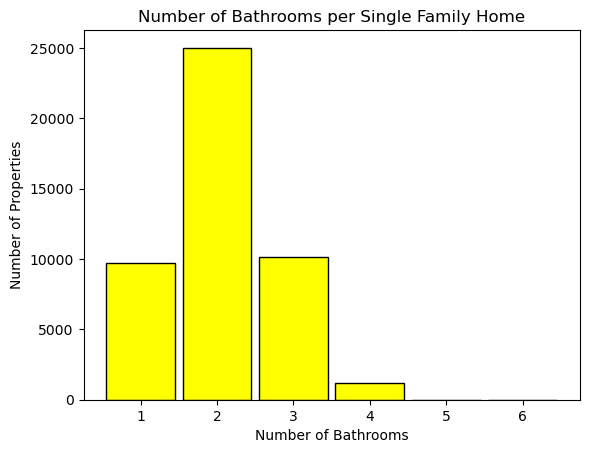


The mean number of bathrooms is 2.12
The median number of bathrooms is 2.0
The mode number of bathrooms is 2.0
The feature bathrooms has a relatively normal distribution
____________________________________________________________
____________________________________________________________


In [5]:
# Number of Bathrooms

plt.hist(x='bathrooms', data=zillow, bins=range(1,8), 
         rwidth=.9, color='yellow', ec='black', align='left')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Properties')
plt.title('Number of Bathrooms per Single Family Home')
plt.show()
print(f'\nThe mean number of bathrooms is {zillow.bathrooms.mean():.2f}')
print(f'The median number of bathrooms is {zillow.bathrooms.median():.1f}')
print(f'The mode number of bathrooms is {zillow.bathrooms.mode()[0]:.1f}')
print('The feature bathrooms has a relatively normal distribution')
print('____________________________________________________________')
print('____________________________________________________________')

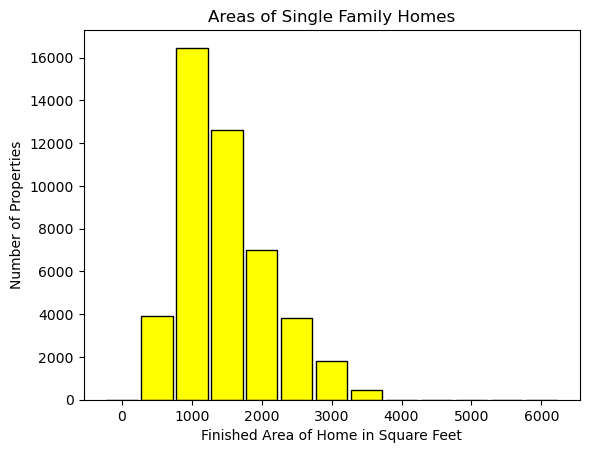


The mean square footage is 1723
The median square footage is 1583
The mode square footage is 1120
The feature area has a relatively normal distribution with right skew
____________________________________________________________
____________________________________________________________


In [6]:
# Area of home in finished square feet

plt.hist(x='area', data=zillow, bins=range(0,7000,500), 
         rwidth=.9, color='yellow', ec='black', align='left')
plt.xlabel('Finished Area of Home in Square Feet')
plt.ylabel('Number of Properties')
plt.title('Areas of Single Family Homes')
plt.show()
print(f'\nThe mean square footage is {zillow.area.mean():.0f}')
print(f'The median square footage is {zillow.area.median():.0f}')
print(f'The mode square footage is {zillow.area.mode()[0]:.0f}')
print('The feature area has a relatively normal distribution with right skew')
print('____________________________________________________________')
print('____________________________________________________________')

- The Tax Values of the properties seem very low to me for the counties and years under consideration. I will add this to the things to look into in the future.

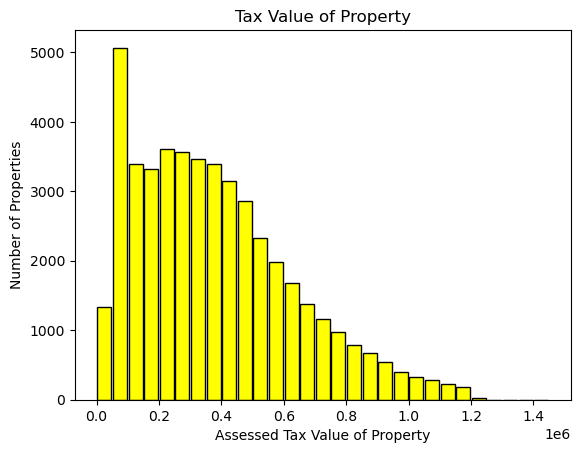


The mean assessed tax value is $379,978
The median assessed tax value is $340,108
The mode assessed tax value is $455,000
The feature tax value has a right-skewed distribution with a
    strong peak in the 50-100k bucket.
____________________________________________________________
____________________________________________________________


In [7]:
# Assessed Tax Value of Home

plt.hist(x='tax_value', data=zillow, bins=range(0,1_500_000, 50_000), 
         rwidth=.9, color='yellow', ec='black', align='mid')
plt.xlabel('Assessed Tax Value of Property')
plt.ylabel('Number of Properties')
plt.title('Tax Value of Property')
plt.show()
print(f'\nThe mean assessed tax value is ${zillow.tax_value.mean():,.0f}')
print(f'The median assessed tax value is ${zillow.tax_value.median():,.0f}')
print(f'The mode assessed tax value is ${zillow.tax_value.mode()[0]:,.0f}')
print('The feature tax value has a right-skewed distribution with a\n\
    strong peak in the 50-100k bucket.')
print('____________________________________________________________')
print('____________________________________________________________')

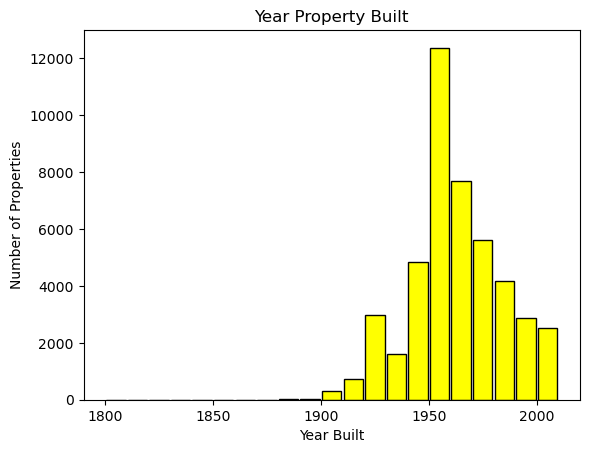


The mean year built is 1962
The median year built is 1960
The mode year built is 1955
The feature year built has a slightly left-skewed distribution with a
    strong peak in the 1950s bucket.
____________________________________________________________
____________________________________________________________


In [8]:
# Year home was built

plt.hist(x='year_built', data=zillow, bins=range(1800,2020,10), 
         rwidth=.9, color='yellow', ec='black', align='mid')
plt.xlabel('Year Built')
plt.ylabel('Number of Properties')
plt.title('Year Property Built')
plt.show()
print(f'\nThe mean year built is {zillow.year_built.mean():.0f}')
print(f'The median year built is {zillow.year_built.median():.0f}')
print(f'The mode year built is {zillow.year_built.mode()[0]:.0f}')
print('The feature year built has a slightly left-skewed distribution with a\n\
    strong peak in the 1950s bucket.')
print('____________________________________________________________')
print('____________________________________________________________')

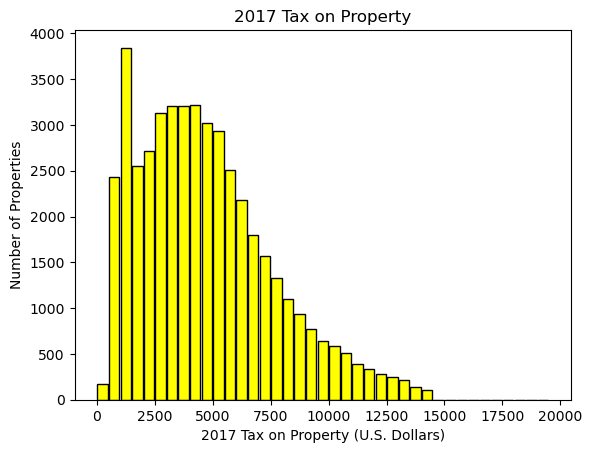


The mean tax is $4,711
The median tax is $4,273
The mode tax is $346
The feature tax amount has a right-skewed distribution with a
    strong peak in the $1500-$2000 bucket.
____________________________________________________________
____________________________________________________________


In [9]:
# Tax Amount of Home

plt.hist(x='tax_amount', data=zillow, bins=range(0,20_000,500), 
         rwidth=.9, color='yellow', ec='black', align='mid')
plt.xlabel('2017 Tax on Property (U.S. Dollars)')
plt.ylabel('Number of Properties')
plt.title('2017 Tax on Property')
plt.show()
print(f'\nThe mean tax is ${zillow.tax_amount.mean():,.0f}')
print(f'The median tax is ${zillow.tax_amount.median():,.0f}')
print(f'The mode tax is ${zillow.tax_amount.mode()[0]:,.0f}')
print('The feature tax amount has a right-skewed distribution with a\n\
    strong peak in the $1500-$2000 bucket.')
print('____________________________________________________________')
print('____________________________________________________________')

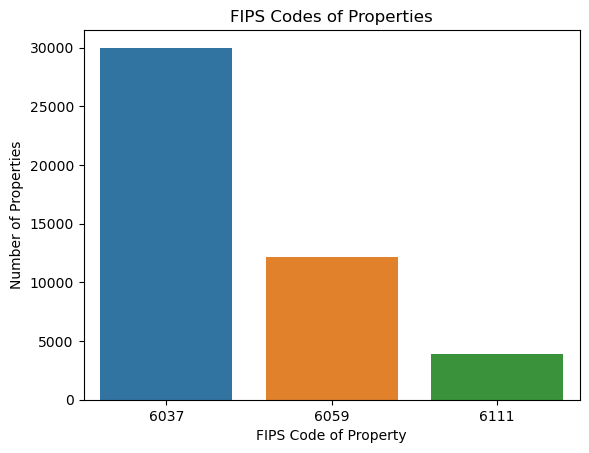

In [10]:
# Assessment of properties by FIPS

sns.countplot(x='fips', data=zillow)
plt.xlabel('FIPS Code of Property')
plt.ylabel('Number of Properties')
plt.title('FIPS Codes of Properties')
plt.show()

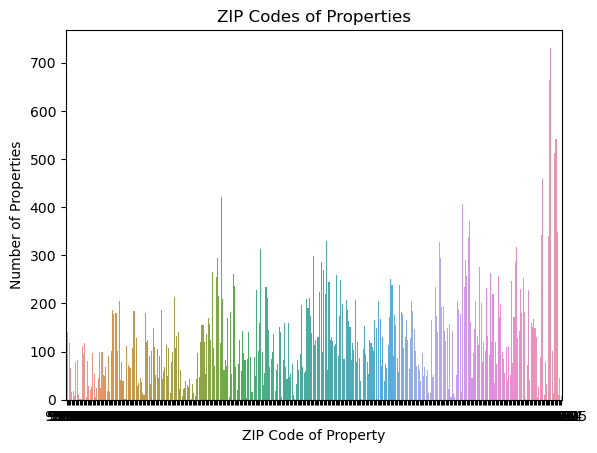

In [11]:
sns.countplot(x='zip', data=zillow)
plt.xlabel('ZIP Code of Property')
plt.ylabel('Number of Properties')
plt.title('ZIP Codes of Properties')
plt.show()

##### Can see there are large disparities in number of properties per ZIP code, ranging from near zero to over 700.

#### Univariate Summary:
**For single-family homes with a transaction in 2017:**

1. average home was built in 1962
2. had 3.22 bedrooms
3. had 2.12 bathrooms
4. was 1725 square feet
5. with a mean tax value of \$381,625
6. and a mean tax amount of \$4,729
7. The majority were in LA County, followed by Orange, then Ventura

- bedrooms, bathrooms, and year built are relatively normally distributed
- finished area is slightly right skewed
- tax value and tax are both right skewed with a strong peak near the lower boundary



### Splitting Dataset

In [12]:
train, val, test = w.wrangle_zillow()

In [13]:
train.shape, val.shape, test.shape

((25825, 13), (11068, 13), (9224, 13))

### Bivariate Analysis

In [14]:
# sns.pairplot(train.sample(1000), corner=True)
# plt.show()

#### Bivariate Questions:

1. Is there a correlation between the number of bathrooms and the tax value?
2. Is there a correlation between the number of bedrooms and the tax value?
3. Is there a correlation between the area of the house and the tax value?
4. Is there a correlation between FIPS and the tax value of the house?

#### 1. Test correlation between number of bathrooms and tax value

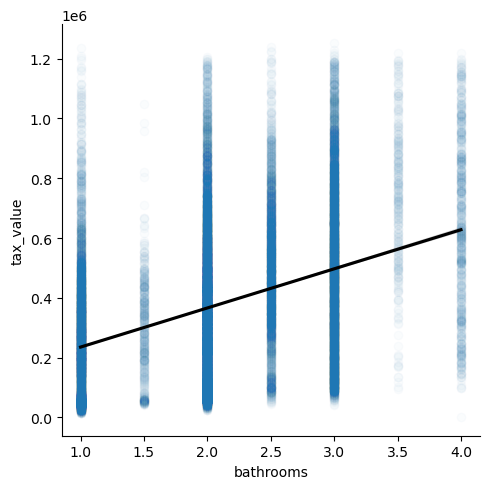

In [15]:
sns.lmplot(x='bathrooms', y='tax_value', data=train, 
           line_kws={'color': 'black'}, scatter_kws={'alpha': 0.02})
plt.show()

In [16]:
# visually it appears there is a correlation
# to confirm, statisically test a hypothesis
# use spearman test due to the ordinal nature
# bathrooms and the non_normality of tax_value.

$H_0:$ There is no linear correlation between bathrooms and tax value

$H_1:$ There is a linear correlation between bathrooms and tax value

In [17]:
# Let's set a 95% confidence level for statistical significance, so
α = 0.05

corr_bath, p_bath = stats.spearmanr(train.bathrooms, train.tax_value)

if p_bath < α:
    print(f'Correlation coefficient: {corr_bath}')
    print(f'p: {p_bath}')
    print('Reject the null hypothesis that there is no linear correlation between bathrooms and tax value')
else:
    print('We cannot reject the null hypothesis that there is no linear correlation between bathrooms and tax value')

Correlation coefficient: 0.3822895158135403
p: 0.0
Reject the null hypothesis that there is no linear correlation between bathrooms and tax value


#### 2. Test correlation between the number of bedrooms and the tax value?


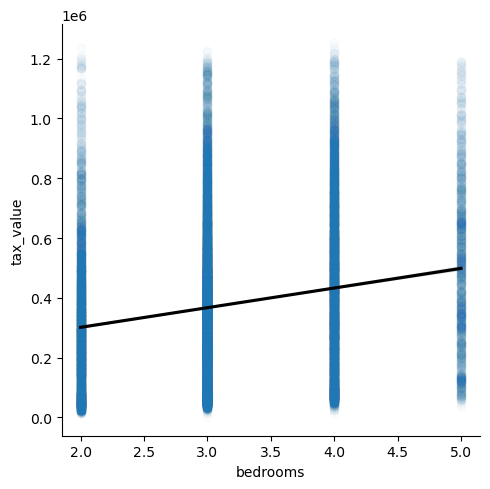

In [18]:
sns.lmplot(x='bedrooms', y='tax_value', data=train, 
           line_kws={'color': 'black'}, scatter_kws={'alpha': 0.02})
plt.show()

In [19]:
# visually it appears there is a correlation
# to confirm, statisically test a hypothesis
# use spearman test due to the ordinal nature
# bedrooms and the non_normality of tax_value.

$H_0:$ There is no linear correlation between bedrooms and tax value

$H_1:$ There is a linear correlation between bedrooms and tax value

In [20]:
# Let's set a 95% confidence level for statistical significance, so
α = 0.05

corr_bed, p_bed = stats.spearmanr(train.bedrooms, train.tax_value)

if p_bath < α:
    print(f'Correlation coefficient: {corr_bed}')
    print(f'p: {p_bath}')
    print('Reject the null hypothesis that there is no linear correlation between bedrooms and tax value')
else:
    print('We cannot reject the null hypothesis that there is no linear correlation between bedrooms and tax value')

Correlation coefficient: 0.20925125469480507
p: 0.0
Reject the null hypothesis that there is no linear correlation between bedrooms and tax value


#### 3. Is there a correlation between the area of the house and the tax value?


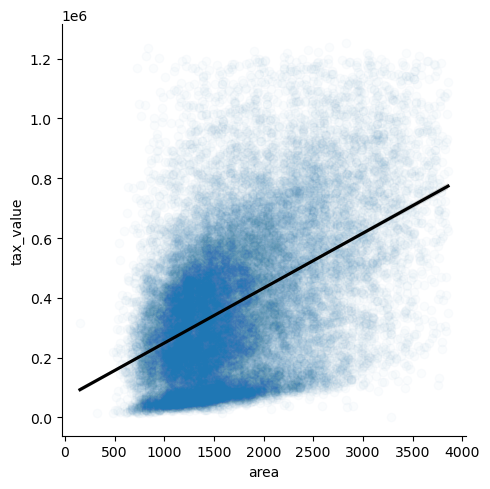

In [21]:
sns.lmplot(x='area', y='tax_value', data=train, 
           line_kws={'color': 'black'}, scatter_kws={'alpha': 0.02})
plt.show()

In [22]:
# visually it appears there is a correlation
# to confirm, statisically test a hypothesis
# use pearson r test as area is relatively normal.

$H_0:$ There is no linear correlation between bedrooms and tax value

$H_1:$ There is a linear correlation between bedrooms and tax value

In [23]:
# Let's set a 95% confidence level for statistical significance, so
α = 0.05

corr_area, p_area = stats.pearsonr(train.area, train.tax_value)

if p_bath < α:
    print(f'Correlation coefficient: {corr_area}')
    print(f'p: {p_area}')
    print('Reject the null hypothesis that there is no linear correlation between area and tax value')
else:
    print('We cannot reject the null hypothesis that there is no linear correlation between area and tax value')

Correlation coefficient: 0.46155576134375303
p: 0.0
Reject the null hypothesis that there is no linear correlation between area and tax value


#### 4. Is there a correlation between FIPS and the tax value of the house?

Text(0.5, 1.0, 'Mean Tax Value by FIPS')

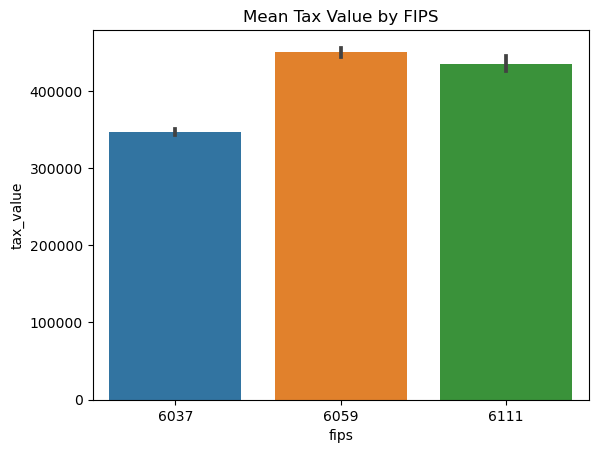

In [24]:
sns.barplot(x='fips', y='tax_value', data=train)
plt.show
plt.title('Mean Tax Value by FIPS')

In [25]:
# It appears there is a correlation between fips and tax_value
# best to check this pairwise for significance with statistical testing
# start with 6037 v 6059, then 6059 v 6111, then 6037 v 6111

In [26]:
train.fips.value_counts(normalize=True).round(3)

6037    0.654
6059    0.262
6111    0.085
Name: fips, dtype: float64

In [27]:
unique_fips = train.fips.unique().tolist()
unique_fips

[6037, 6059, 6111]

In [28]:
fip_6037 = train[train.fips == 6037]
fip_6059 = train[train.fips == 6059]
fip_6111 = train[train.fips == 6111]

fips_dict = {'LA County 6037 v Orange County 6059': stats.ttest_ind(fip_6037.tax_value, fip_6059.tax_value)}
fips_dict['LA County 6037 v Ventura County 6111'] = stats.ttest_ind(fip_6037.tax_value, fip_6111.tax_value)
fips_dict['Orange County 6059 v Ventura County 6111'] = stats.ttest_ind(fip_6059.tax_value, fip_6111.tax_value)

fips_dict = pd.DataFrame(fips_dict, index=['t_stat', 'p_value'])
fips_dict = fips_dict.T
fips_dict['reject_null?'] = fips_dict.p_value < α
fips_dict
# print(f't-stat: {t_stat}')
# print(f'p: {p}')
# if p < α:
#     print(f'Reject the null hypothesis that there is no linear \
#     correlation between {combo[0]} and tax value')
# else:
#     print('We cannot reject the null hypothesis that there is no linear \
#     correlation between area and tax value')

,t_stat,p_value,reject_null?
LA County 6037 v Orange County 6059,-28.431993,7.117963e-175,True
LA County 6037 v Ventura County 6111,-15.736781,1.890641e-55,True
Orange County 6059 v Ventura County 6111,2.338386,1.938917e-02,True


#### Tax Value by ZIP Code

In [29]:
train.zip.value_counts()

97319    432
97318    379
97328    298
97329    289
96987    233
        ... 
95996      1
95995      1
96038      1
96226      1
96467      1
Name: zip, Length: 376, dtype: int64

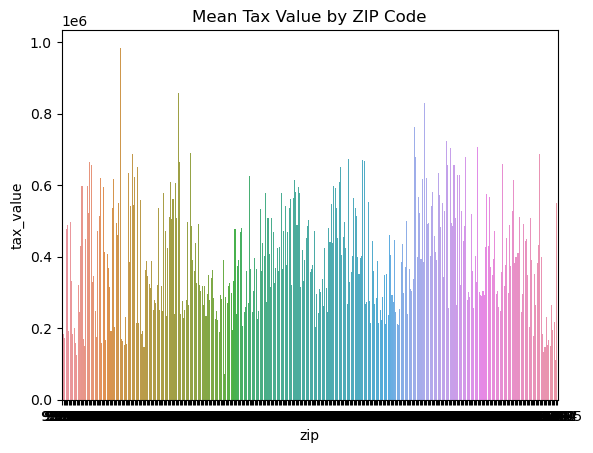

In [30]:
zip_mean_value = train.tax_value.groupby(train.zip
                                        ).agg('mean').sort_values(ascending=False).reset_index()
sns.barplot(x='zip', y='tax_value', data=zip_mean_value)
plt.title('Mean Tax Value by ZIP Code')
plt.show()

In [31]:
zip_tv = train.tax_value.groupby(train.zip
                                        ).agg('mean').round().to_dict()

In [32]:
# need an ordinal column to get the plot I want
zip_mean_value['tax_value_rank'] = range(len(zip_mean_value))
zip_mean_value.head()

,zip,tax_value,tax_value_rank
0,96038,984792.000000,0
1,96128,856795.000000,1
2,96952,830973.571429,2
3,96939,763198.384615,3
4,96975,723370.333333,4


In [33]:
lambda x: zip_tv[x]

<function __main__.<lambda>(x)>

In [34]:
# train['zip_mean_tv'] = train.zip.apply(lambda x: zip_tv[x])
train.sort_values('zip')

,bedrooms,bathrooms,area,year_built,fips,zip,tax_value_2016,tax_amount_2016,tax_value,tax_amount,age,tax_rate_2016,zip_mean_tv_2016
45614,3,2.0,1096.0,1926,6037,95982,170558.0,3736.87,300000.0,3736.87,91,0.02191,162893.0
11820,3,3.0,912.0,1923,6037,95982,252000.0,3634.43,266000.0,3634.43,94,0.01442,162893.0
3757,3,2.0,1253.0,1908,6037,95982,161533.0,2542.36,163995.0,2542.36,109,0.01574,162893.0
36053,2,1.0,552.0,1921,6037,95982,174200.0,3259.35,228430.0,3259.35,96,0.01871,162893.0
38431,5,3.0,2696.0,1947,6037,95982,394326.0,6074.89,460314.0,6074.89,70,0.01541,162893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,3,4.0,2305.0,1979,6037,399675,697030.0,8684.32,707659.0,8684.32,38,0.01246,1561326.0
37343,3,2.0,2277.0,1961,6037,399675,138401.0,2036.80,150916.0,2036.80,56,0.01472,1561326.0
4529,4,3.0,2640.0,1965,6037,399675,910904.0,11322.38,924794.0,11322.38,52,0.01243,1561326.0
29090,3,2.0,1895.0,1962,6037,399675,708890.0,8945.78,719700.0,8945.78,55,0.01262,1561326.0


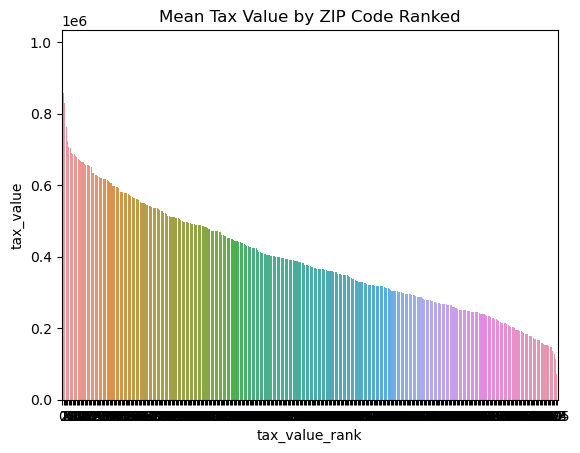

In [35]:
sns.barplot(x='tax_value_rank', y='tax_value', data=zip_mean_value)
plt.title('Mean Tax Value by ZIP Code Ranked')
plt.show()

There is obviously a huge variation in mean tax values based on ZIP code. This is a difficult feature to add directly as one-hot encoding would add 377 features. However, mean tax values for a properties ZIP code could be added as a feature and then scaled.

#### Bivariate Summary:

1. There is a high degree of confidence that there is a linear relationship between:
    a. number of bathrooms and tax value
    b. number of bedrooms and tax value
    c. finished square feet of area and tax value
2. There is a high degree of confidence that there is a corellation between fips code and tax value for all three fips in the dataset.
3. Visually, there is a strong relationship between ZIP Code and tax value.

### Preprocessing

1. Added a feature 'zip_mean_tax_value' for each property's ZIP Code to clean_zillow_2017
    - Base column on tax_value_2016 so not to leak current vals into features.
2. Added feature 'age' to clean_zillow_2017 which starts with the 2017 as 0 year.
3. Encode fips
4. Drop columns not needed for modeling (fips, zip, year_built, tax_amount)
5. Split features from target
2. Scale features

In [36]:
train.head()

,bedrooms,bathrooms,area,year_built,fips,zip,tax_value_2016,tax_amount_2016,tax_value,tax_amount,age,tax_rate_2016,zip_mean_tv_2016
38593,3,2.0,1586.0,1947,6037,96239,229088.0,2964.35,232581.0,2964.35,70,0.01294,223554.0
36996,3,2.0,1564.0,1988,6037,97328,114125.0,2240.56,115865.0,2240.56,29,0.01963,144078.0
20680,3,2.0,1828.0,1977,6059,96954,409428.0,4281.16,415671.0,4281.16,40,0.01046,748833.0
26075,2,2.0,1472.0,1976,6059,96996,226542.0,2346.10,229996.0,2346.10,41,0.01036,478161.0
42330,5,3.0,2107.0,1952,6037,96508,349726.0,4493.86,355058.0,4493.86,65,0.01285,191412.0


In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25825 entries, 38593 to 4924
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bedrooms          25825 non-null  int64  
 1   bathrooms         25825 non-null  float64
 2   area              25825 non-null  float64
 3   year_built        25825 non-null  int64  
 4   fips              25825 non-null  int64  
 5   zip               25825 non-null  int64  
 6   tax_value_2016    25825 non-null  float64
 7   tax_amount_2016   25825 non-null  float64
 8   tax_value         25825 non-null  float64
 9   tax_amount        25825 non-null  float64
 10  age               25825 non-null  int64  
 11  tax_rate_2016     25825 non-null  float64
 12  zip_mean_tv_2016  25825 non-null  float64
dtypes: float64(8), int64(5)
memory usage: 2.8 MB


In [38]:
# preprocessing steps except scaling:
    # encoded fips
    # dropped columns=['zip', 'year_built', 'fips', 'tax_amount']
    # split features from target for each dataset

X_train, y_train = p.prep_train(train)
X_val, y_val = p.prep_val(val)
X_test, y_test = p.prep_test(test)

X_train.head()

,bedrooms,bathrooms,area,tax_value_2016,tax_amount_2016,age,tax_rate_2016,zip_mean_tv_2016,6059,6111
38593,3,2.0,1586.0,229088.0,2964.35,70,0.01294,223554.0,0,0
36996,3,2.0,1564.0,114125.0,2240.56,29,0.01963,144078.0,0,0
20680,3,2.0,1828.0,409428.0,4281.16,40,0.01046,748833.0,1,0
26075,2,2.0,1472.0,226542.0,2346.10,41,0.01036,478161.0,1,0
42330,5,3.0,2107.0,349726.0,4493.86,65,0.01285,191412.0,0,0


In [39]:
# scaling:
X_train_scaled, X_val_scaled, X_test_scaled = p.scale_zillow(X_train, X_val, X_test)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warning

In [40]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9
0,0.333333,0.333333,0.387045,0.185837,0.187395,0.496350,0.020539,0.039272,0.0,0.0
1,0.333333,0.333333,0.381107,0.088040,0.140869,0.197080,0.031549,0.013224,0.0,0.0
2,0.333333,0.333333,0.452362,0.339248,0.272040,0.277372,0.016458,0.211432,1.0,0.0
3,0.000000,0.333333,0.356275,0.183671,0.147654,0.284672,0.016293,0.122719,1.0,0.0
4,1.000000,0.666667,0.527665,0.288461,0.285713,0.459854,0.020391,0.028738,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25820,0.666667,0.000000,0.274764,0.024828,0.047642,0.656934,0.031911,0.167510,0.0,0.0
25821,0.333333,0.000000,0.274494,0.020387,0.022564,0.627737,0.018482,0.087460,0.0,1.0
25822,0.000000,0.000000,0.272065,0.029626,0.033209,0.489051,0.020556,0.048280,0.0,1.0
25823,0.333333,0.333333,0.319298,0.241159,0.289869,0.452555,0.024752,0.074815,0.0,0.0
